In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import sys
import scipy.linalg
import cv2
sys.path.insert(0,'/home/luzai/App/caffe/python/')
sys.path.insert(0,'/home/xlwang/App/caffe/python')
import caffe
# %matplotlib inline

In [4]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [3]:
solver=None
solver=caffe.get_solver('cifar/cifar10_quick_solver.prototxt')

npnt=4 #TODO --> 8 
natpt=1 #TODO --> 5
noisy_frac_arr= [ 0,   0.2 ,   0.4,   0.6]
acc_arr=np.zeros((npnt,natpt))

In [4]:
for i in range(natpt):
    del solver
    solver=None
    solver=caffe.get_solver('cifar/cifar10_quick_solver.prototxt')
    solver.solve()
#     solver.step(1)
    acc_arr[0,i]=solver.test_nets[0].blobs['accuracy'].data

In [5]:
for idx,noisy_frac in enumerate(noisy_frac_arr[1:]):
    for idx_atpt in range(natpt):
        del solver
        solver=None
        filename='cifar/cifar10_quick_solver_'+str(noisy_frac_arr[idx+1])+'.prototxt'
        print filename
        
        solver=caffe.get_solver(filename)
        solver.solve()
#         solver.step(1)
        acc_arr[idx+1,idx_atpt]=solver.test_nets[0].blobs['accuracy'].data
        # print '\n',solver.net.blobs['label'].data
        
print zip( noisy_frac_arr, acc_arr) 
np.save('./output/acc_arr',acc_arr)

cifar/cifar10_quick_solver_0.2.prototxt
cifar/cifar10_quick_solver_0.4.prototxt
cifar/cifar10_quick_solver_0.6.prototxt
[(0, array([ 0.09])), (0.2, array([ 0.1])), (0.4, array([ 0.09])), (0.6, array([ 0.16500001]))]


In [6]:
acc_arr

array([[ 0.09      ],
       [ 0.1       ],
       [ 0.09      ],
       [ 0.16500001]])

In [7]:
ls

acc_arr.npy  cifar/     legacy/       mnist/   question.ipynb  test.ipynb
caffe-test/  external/  mCaffe.ipynb  output/  res/            test.py


In [6]:
acc_arr=np.load("./acc_arr.npy")
print acc_arr

[[ 0.76499999]
 [ 0.46000001]
 [ 0.41499999]
 [ 0.41      ]]


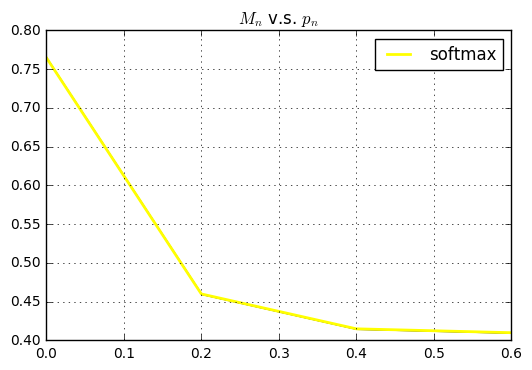

In [4]:
%matplotlib inline
noisy_frac_arr= [ 0,   0.2 ,   0.4,   0.6]
acc_arr=np.load('./acc_arr.npy')
mu=acc_arr.mean(1)
sigma=acc_arr.std(1)

fig,ax=plt.subplots(1)
ax.plot(noisy_frac_arr,mu,lw=2,label='softmax',color='yellow')
ax.fill_between(noisy_frac_arr,mu+sigma,mu-sigma,facecolor='yellow',alpha=0.5)
ax.set_title('$M_n$ v.s. $p_n$')
ax.legend(loc='upper right')
ax.grid()